<br>
# Set up and exploring an already-implemented distribution (the Normal)
Pyro has a system for making PyTorch distributions easily usable in a Bayesian context.

Below is how they do it for the Normal distribution

In [1]:
from __future__ import absolute_import, division, print_function

import torch

from pyro.distributions.torch_distribution import TorchDistributionMixin

In [2]:
class Normal(torch.distributions.Normal, TorchDistributionMixin):
    def expand(self, batch_shape):
        validate_args = self.__dict__.get('validate_args')
        loc = self.loc.expand(batch_shape)
        scale = self.scale.expand(batch_shape)
        return Normal(loc, scale, validate_args=validate_args)

And here is how you sample from that distribution, with a nice plot for sanity check

In [3]:
from pyro import sample
import matplotlib.pyplot as plt
import seaborn as sb

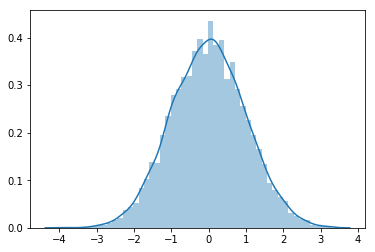

In [4]:
normal_samples = []

for i in range(10000):
    normal_samples.append(sample('arbitrary_name', Normal(loc = 0, scale = 1)))
    
sb.distplot(normal_samples);

# Creating a Pyro-enabled Pareto distribution

In [5]:
class Pareto(torch.distributions.Pareto, TorchDistributionMixin):
    def expand(self, batch_shape):
        validate_args = self.__dict__.get('validate_args')
        scale = self.scale.expand(batch_shape)
        alpha = self.alpha.expand(batch_shape)
        return Pareto(scale, alpha, validate_args=validate_args)

# Visualizing this distribution

In [6]:
def explore_Pareto_params(scale, alpha):
    sample_list = []
    for trial in range(10000):
        trials_sample = sample('nth_sample',
                               Pareto(scale,
                                      alpha)).item()
        sample_list.append(trials_sample)
    plt.figure()
    sb.distplot(sample_list).set_title('Scale: ' + str(scale) + ', Alpha: ' + str(alpha))

### 1. For different alpha values

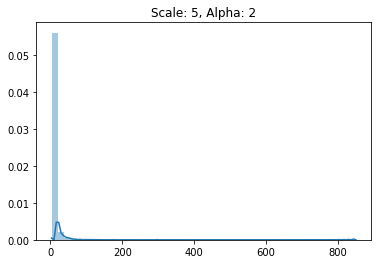

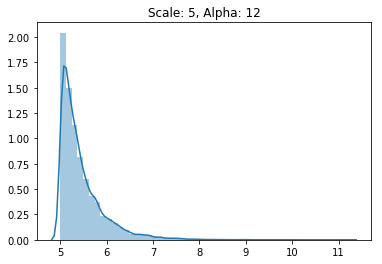

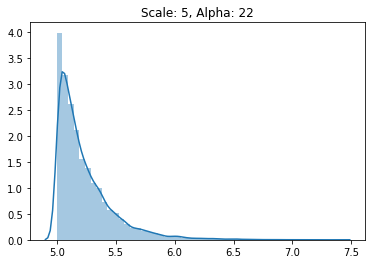

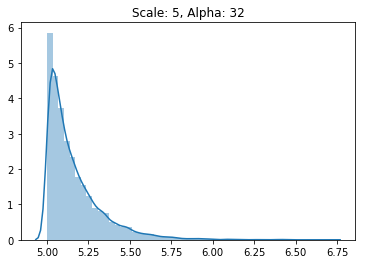

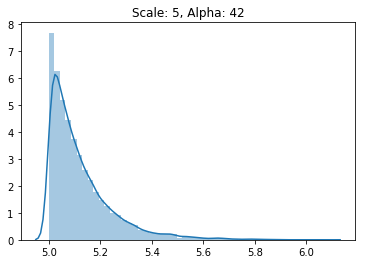

In [7]:
for i in range(2, 52, 10):
    explore_Pareto_params(scale = 5, alpha = i)

It would seem that **smaller alphas model a system with fewer zeros and more extreme values**

### 2. For different scale values

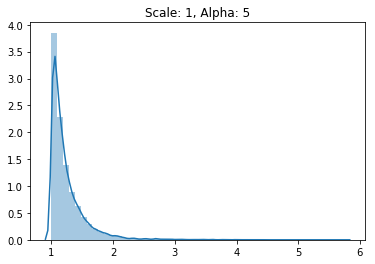

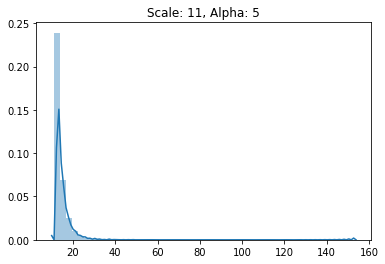

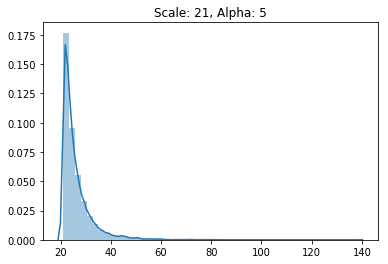

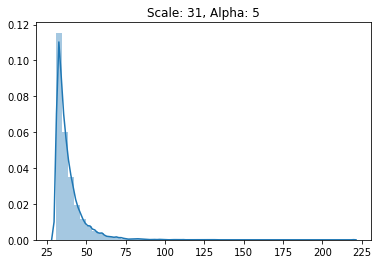

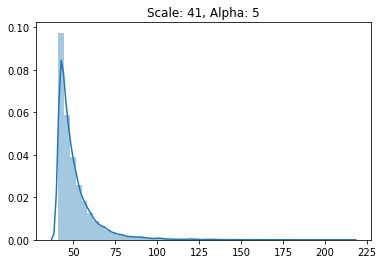

In [8]:
for i in range(1, 51, 10):
    explore_Pareto_params(scale = i, alpha = 5)

It would seem that **smaller scales model systems with more zeros and fewer & smaller extreme values**